# Modeling for Capstone Two: Music & Happiness

### Table of Contents

* [Introduction](#start)
    * [Goal](#goal)
    * [Import relevant libraries](#import)
    * [Load variables from pre-processing \& training phase](#load)
* [Modeling with Linear Regression](#linear-regression)
    * [Training and fitting](#lr-train)
    * [Residual analysis](#lr-residual)
    * [Scatterplot of predictions vs. actual values](#lr-scatter)
* [Modeling with Random Forest Regression](#random-forest)
    * [Training and fitting](#rf-train)
    * [Residual analysis](#rf-residual)
    * [Scatterplot of predictions vs. actual values](#rf-scatter)
* [Modeling with Gradient Boosting Regressor](#gbr)
    * [Training and fitting](#gbr-train)
    * [Residual analysis](#gbr-residual)
    * [Scatterplot of predictions vs. actual values](#gbr-scatter)
* [Model comparison and evaluation](#comparison)
* [Analysis](#analysis)

## 1 - Introduction <a name="start"></a>

### 1.1 Goal <a name="goal"></a>
Previously, we explored Spotify user metrics from 71 countries and their potential relationships to measures from the 2023 World Happiness Report. Our goal is to determine whether any of these metrics - or perhaps a combination of them - effectively predict how a country might rank on the ladder score of the World Happiness Report. 

#### About the Ladder Score
As previously mentioned in our exploratory data analysis section, the "ladder score" is the "national average response to the question of life evaluations." This is how each survey respondent answered the question, "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?" (This definition comes directly from the statistical appendix of the 2023 World Happiness Report (WHR), which can be found on the official [World Happiness Report website](https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf).)

### 1.2 Import relevant libraries <a name="import"></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1.3 Load variables from pre-processing and training phase <a name="load"></a>
Previously, we split and trained our data in preparation for creating our model. We stored these variables as `X_train`, `X_test`, `y_train`, and `y_test`. We will retrieve them here:

In [20]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r df

## 2 - Modeling with Linear Regression <a name="linear-regression"></a>

### 2.1 Training and fitting <a name="lr-name"></a>

In [3]:
# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model using MAE, MSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Linear Regression Results:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

Linear Regression Results:
MAE: 0.38993954856527535
MSE: 0.23537241793991873
R-squared: 0.6458859221793622


#### Interpretation of results
The $R^2$ coefficient, also known as the "coefficient of determination," is a measure of how successfully our model predicts our data's variation from the mean. A score of $1.0$ would indicate a perfect model that explains 100% of the variation.

Currently, with an $R^2$ value of 0.6459, our model explains only about 65% of the variation from the mean. Furthermore, our MSE being lower than MAE suggests that our model is not heavily influenced by outliers and the residuals are relatively evenly distributed. We will confirm this in the following segment, in which we perform residual analysis on the model.

### 2.2 Residual analysis <a name="lr-residual"></a>

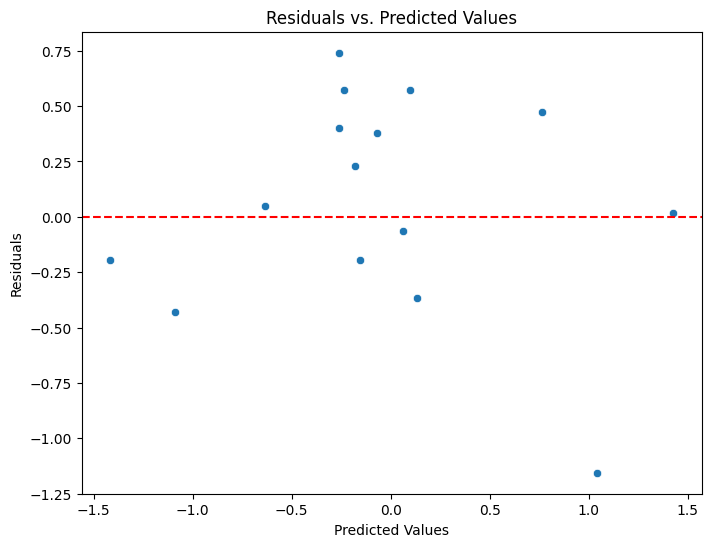

In [4]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

As expected, our residuals are relatively evenly distributed. They also seem to be randomly scattered, which suggests that our linear model fits well.

### 2.3 Scatterplot of predictions vs. actual values <a name="lr-scatter"></a>

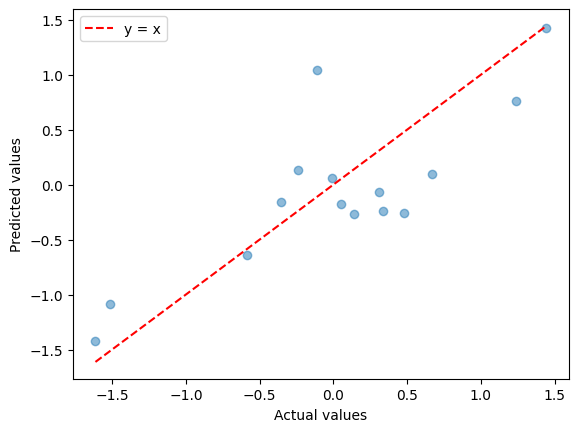

In [5]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

min_val = min(min(y_test), min(y_pred))  # Find the minimum value
max_val = max(max(y_test), max(y_pred))  # Find the maximum value
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="y = x")

plt.legend()
plt.show()

In an accurate model, we would expect the points in our scatterplot of predicted vs. actual values to lie relatively close to the diagonal line $y=x$. For ease of assessment, we have added this line to our graph as a dashed red line.

Furthermore, points should be symmetrically distributed along the diagonal line with no systematic pattern, like a downward or upward curve. Such a pattern could indicate under- or overfitting in our model.

Additionally, while some outliers are expeceted, there should not be an excessive amount of points that lie far away from the dashed line.

The points on our scatterplot align closely to our dashed line and seem to be symmetrically distributed without a systematic pattern. Also, there is only one significant outlier. So far, the linear regression model seems to be a promising choice for us to proceed with. To be sure, let's compare our results with two additional models: Random Forest Regression and Gradient Boosting Regression.

## 3 - Modeling with Random Forest Regression <a name="random-forest"></a>

### 3.1 Training and fitting <a name="rf-train"></a>

In [6]:
# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model using MAE, MSE, and R-squared
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output the results
print(f"Random Forest Regression Results:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R-squared: {r2_rf}")

Random Forest Regression Results:
MAE: 0.5422061696382587
MSE: 0.40637031650419225
R-squared: 0.38862228997751536


Our $R^2$ for our random forest regression model is 0.3886, meaning our model explains about 39% of the variation from the mean, which is even less than our linear regression model. Already, our linear regression model is outperforming the random forest regression model.

Furthermore, both our MAE and MSE are higher than they were in the linear regression model, indicating that the random forest regression model is more sensitive to outliers.

### 3.2 Residual analysis <a name="rf-residual"></a>

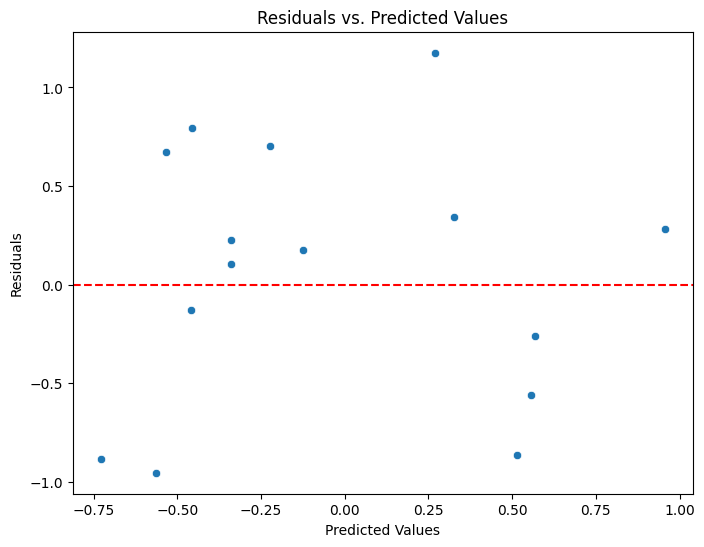

In [7]:
# Calculate residuals
residuals = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

Again, our residuals seem to be randomly distributed; however, unlike our residuals for linear regression, our residuals are mostly greater than 0. This means that our random forest regression model is underpredicting the actual values, and there could be some bias in our model. This may also indicate underfitting in our model.

### 3.3 Scatterplot of predictions vs. actual values <a name="#rf-scatter"></a>

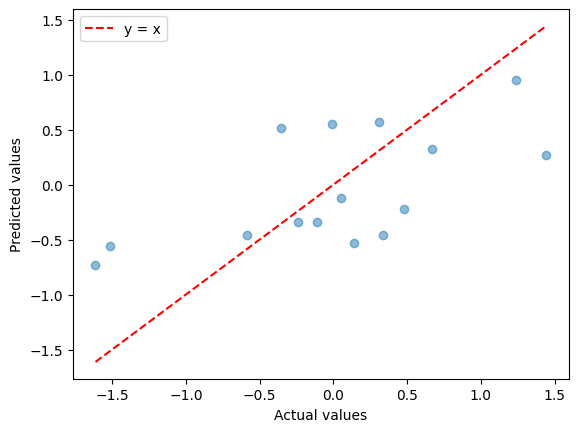

In [8]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

min_val = min(min(y_test), min(y_pred_rf))  # Find the minimum value
max_val = max(max(y_test), max(y_pred_rf))  # Find the maximum value
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="y = x")

plt.legend()
plt.show()

While the points in our random forest regression scatterplot for predicted vs. actual values seem to be generally increasing, unlike our linear regression scatterplot, they are not increasing in close alignment with the diagonal.

Our random forest model has shown several weaknesses compared to our linear regression model: it is more sensitive to error, has a large amount of positive residuals which indicates underfitting, and weak diagonal alignment of predicted vs. actual values. Taking all this into account, so far, our linear regression model appears to be the stronger contender. However, to be sure, let's look at one more potential model: the Gradient Boosting Regressor.

## 4 - Model with Gradient Boosting Regressor (GBR) <a name="gbr"></a>

### 4.1 Training and fitting <a name="gbr-train"></a>

In [9]:
# Initialize the model
gbr = GradientBoostingRegressor()

# Fit the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model using MAE, MSE, and R-squared
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Output the results
print('Gradient Boosting Regression Results:')
print(f'MAE: {mae_gbr}')
print(f'MSE: {mse_gbr}')
print(f'R-squared: {r2_gbr}')

Gradient Boosting Regression Results:
MAE: 0.5461026360259382
MSE: 0.4362693495427743
R-squared: 0.3436396679487572


Our GBR results are even less impressive than our random forest regression results. With an $R^2$ of 0.3143, this model explains only 31% of the variation from the mean -- even less than our random forest regression model. The MAE and MSE are also similar but slightly higher than they were for our random forest regression model, meaning our GBR model is slightly more sensitive to error.

### 4.2 Residual analysis <a name="gbr-residual"></a>

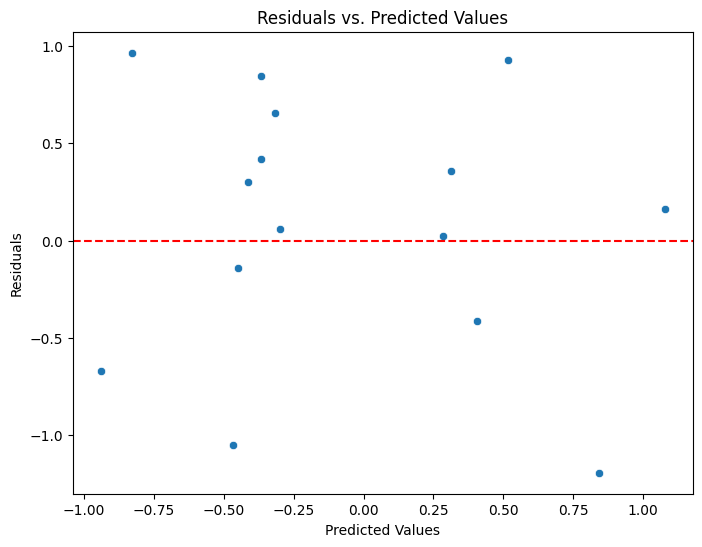

In [10]:
# Calculate residuals
residuals = y_test - y_pred_gbr

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_gbr, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

Similar to our random forest regression model, the residuals seem to be mostly above 0, indicating underfitting problems once again.

### 4.3 Scatterplot of predictions vs. actual values <a name="#gbr-scatter"></a>

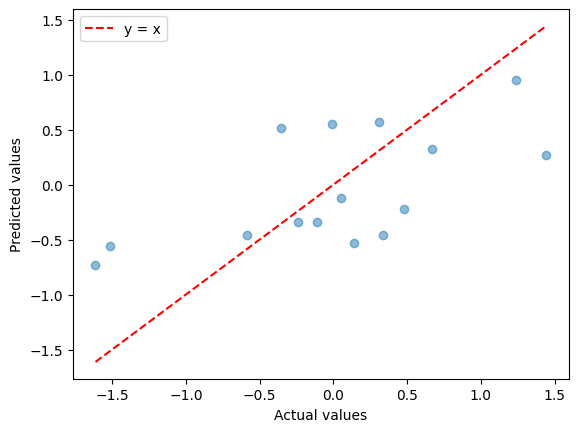

In [11]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

min_val = min(min(y_test), min(y_pred_gbr))  # Find the minimum value
max_val = max(max(y_test), max(y_pred_gbr))  # Find the maximum value
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="y = x")

plt.legend()
plt.show()

This scatterplot for predicted vs. actual values strongly resembles the one for random forest regression, meaning it suffers from the same problems. These points are not increasing in close alignment with the diagonal, so our GBR model is not capturing the underlying relationship well.

## 5 - Model Comparison and Evaluation <a name="comparison"></a>

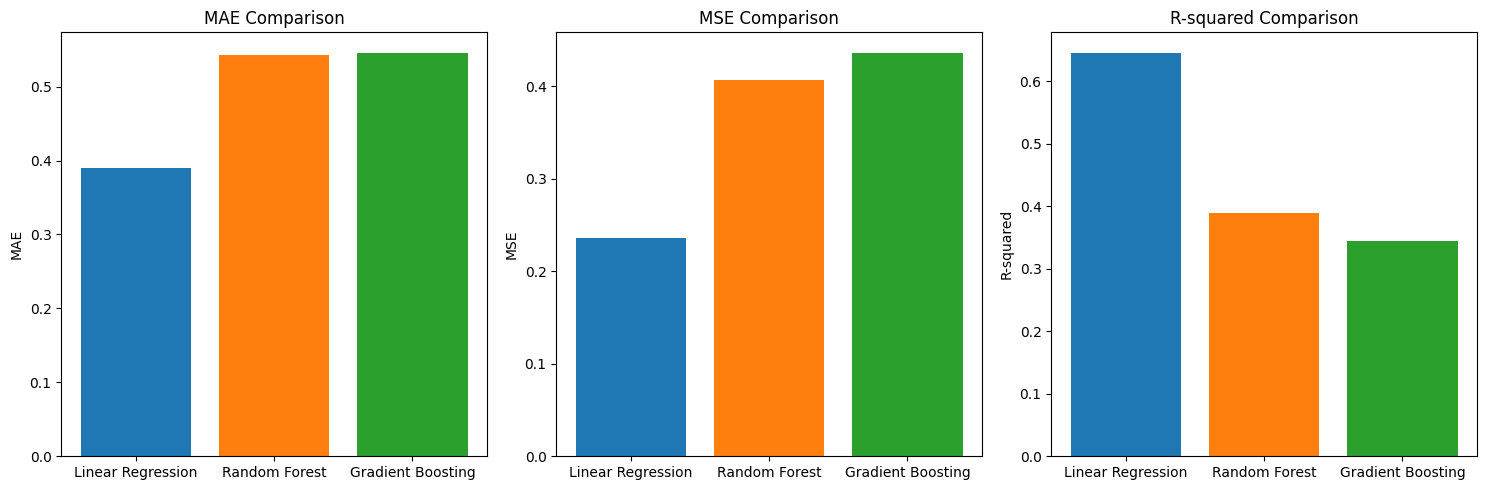

In [12]:
# Metrics from each model
metrics = {
    'Linear Regression': {'MAE': mae, 'MSE': mse, 'R2': r2},
    'Random Forest': {'MAE': mae_rf, 'MSE': mse_rf, 'R2': r2_rf},
    'Gradient Boosting': {'MAE': mae_gbr, 'MSE': mse_gbr, 'R2': r2_gbr}
}

# Extract the metrics for plotting
models = list(metrics.keys())
mae_values = [metrics[model]['MAE'] for model in models]
mse_values = [metrics[model]['MSE'] for model in models]
r2_values = [metrics[model]['R2'] for model in models]

# Set up the figure and axes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Bar plot for MAE
ax[0].bar(models, mae_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax[0].set_title('MAE Comparison')
ax[0].set_ylabel('MAE')

# Bar plot for MSE
ax[1].bar(models, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax[1].set_title('MSE Comparison')
ax[1].set_ylabel('MSE')

# Bar plot for R-squared
ax[2].bar(models, r2_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax[2].set_title('R-squared Comparison')
ax[2].set_ylabel('R-squared')

# Adjust layout
plt.tight_layout()
plt.show()

We have mentioned previously how linear regression's results have far outperformed our random forest and gradient boosting regression models. To drive this home, we can visually compare these metrics.

MAE and MSE, again, were similarly high for our random forest regression and gradient boosting regression models, indicating high sensitivity to error for both of these models. $R^2$ values were also low for both of these models, indicating that neither one explained variance well.

Our linear regression model, on the other hand, demonstrated low sensitivity to error and reasonably high account for variance. Furthermore, its predicted vs. actual values were in close alignment with the diagonal $y=x$. For these reasons, **we will proceed with using our linear regression model for this project.**

## 6 - Analysis <a name="analysis"></a>

In [14]:
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

In [15]:
# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

In [16]:
# View the DataFrame
print("Intercept:", intercept)
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)
coef_df

Intercept: -0.13938567436716934


,Feature,Coefficient
43,country_Israel,0.991050
31,country_Finland,0.824449
67,country_Singapore,0.820394
90,region_Western Europe,0.736190
59,country_Panama,0.731271
...,...,...
62,country_Philippines,-0.717656
4,energy,-0.750008
37,country_Hong Kong,-0.877713
76,country_Turkey,-1.115679


In [21]:
# Baseline country identification
all_countries = ['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada',
                 'Chile', 'Colombia', 'Costa Rica', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador',
                 'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Guatemala',
                 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel',
                 'Italy', 'Japan', 'Kazakhstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
                 'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Panama',
                 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'Singapore',
                 'Slovakia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
                 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 
                 'Venezuela', 'Vietnam']

# Get the one-hot encoded country columns (assuming 'X' is your features DataFrame)
encoded_countries = [col.replace('country_', '') for col in df.columns if col.startswith('country_')]

# Find the baseline country
baseline_country = set(all_countries) - set(encoded_countries)
print("Baseline Country:", baseline_country)


Baseline Country: set()


In [22]:
df

,ladder_score,gdp_per_capita,social_support,life_expectancy,life_choice_freedom,generosity,corruption,popularity,is_explicit,duration_ms,...,country_Venezuela,country_Vietnam,region_East Asia,region_Eastern Europe,region_Latin America,region_Middle East and North Africa,region_South and South East Asia,region_Sub Saharan Africa,region_Western Europe,region_Western Offshoots
0,1.945856,0.705350,1.254684,0.745662,1.490476,-0.178546,-2.274951,-1.325841,-0.882964,-1.046849,...,False,False,False,False,False,False,False,False,True,False
1,1.678419,0.883101,1.074404,0.769691,1.178856,0.941283,-2.209425,-0.826140,0.544376,-0.578623,...,False,False,False,False,False,False,False,False,True,False
2,1.609720,0.814092,1.422946,0.961922,1.201939,1.504857,-0.000264,-2.414943,-0.021026,-0.060910,...,False,False,False,False,False,False,False,False,True,False
3,1.539793,0.545374,0.942198,1.117389,-0.263828,-0.207822,0.186953,-1.852182,-1.366615,0.740681,...,False,False,False,False,False,True,False,False,False,False
4,1.453919,0.862189,0.785955,0.841778,0.636407,1.519495,-1.352907,0.128469,-0.346072,-0.727367,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-1.613020,-1.196588,-3.745093,-0.996188,-0.517741,-1.730204,0.669037,-1.217924,1.339596,-0.420174,...,False,False,False,False,False,True,False,False,False,False
67,-1.967558,0.198236,-0.824550,0.148065,-4.118680,-0.603056,0.594150,0.196141,-1.139569,-1.623210,...,False,False,False,False,False,True,False,False,False,False
68,-2.039938,-1.649331,-3.168195,-2.579209,-0.760112,0.019071,0.556707,0.191951,-1.544368,1.203467,...,False,False,False,False,False,False,True,False,False,False
69,-2.512246,-0.784624,-1.665859,-1.091823,-1.152522,-1.378885,-0.412141,-1.442917,-1.481746,1.389984,...,False,False,False,False,False,True,False,False,False,False
